In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


In [22]:
#Define a function
def function_for_roots(x):
    a = 1.01
    b = -3.04
    c = 2.07
    return a*x**2 + b*x + c #quadratic



In [23]:
#we need a function to check out initial guesses
def check_initial_values(f,x_min,x_max,tol):
    
    #check out initial guesses
    y_min = f(x_min)
    y_max = f(x_max)
    
    #check that x_min and x_max contain a zero crossing
    if(y_min*y_max>0.0):
        print("No zero crossing found in the range =",x_min,x_max)
        s = "f(%f) = %f, f(%f) = %f" % (x_min,y_min,x_max,y_max)
        print(s)
        return 0
    
    #if x_min is a root, then return flag=1
    if(np.fabs(y_min)<tol):
        return 1
    #if x_max is a root, then return flag=2
    if(np.fabs(y_max)<tol):
        return 2
    #if we reach this point, the bracket is valid
    #and we will return 3
    return 3



In [24]:
#now we will define a main work function that performs the
#bisection search 
def bisection_root_finding(f,x_min_start,x_max_start,tol):
    #this function uses bisection search to find a root
    
    x_min = x_min_start #minimum x in bracket
    x_max = x_max_start #maximum x in bracket
    x_mid = 0.0 #mid point of the bracket
    
    y_min = f(x_min) #function value at x_min
    y_max = f(x_max) #function value at x_max
    y_mid = 0.0 #function at midpoint
    
    imax = 10000 #max number of itaration
    i = 0
    
    #check the initial values
    flag = check_initial_values(f, x_min, x_max, tol)
    
    if (flag==0):
        print("Error in bisection_root_finding()")
        raise ValueError("Initial values invalid", x_min,x_max)
    elif(flag==1):
        #lucky guess
        return x_min
    elif(flag==2):
        #another lucky guess
        return x_max
    
#if we reached here, we need to conduct the search 
    #bisection search
    #set a flag 
    flag = 1

    #define a list we can add our result to 
    x_min_list = [] #list of min x values
    x_max_list = [] #list of max x values
    f_xmin = [] #f(x) of min x
    f_xmax = [] #f(x) of max x 
    
    #enter a while loop
    while(flag):
        x_mid = 0.5*(x_min+x_max) #mid point
        y_mid = f(x_mid) #function value at x_mid
    
        #check if x_mid is a root
        if(np.fabs(y_mid)<tol):
            flag = 0
        else:
            #x_mid is not a root 
        
            #if the product of the function at the mid point 
            #and at one of the end points is greater than
            #zero, replace this end point 
            if(f(x_min)*f(x_mid)>0):
                #replace x_min and x_mid
                x_min = x_mid 
            else:
                #replace x_max and x_mid 
                x_max = x_mid 
        
        #print out the iteration
        
        print(x_min,f(x_min),x_max,f(x_max))
        
        f_xmin.append(f(x_min))
        f_xmax.append(f(x_max))
        x_min_list.append(x_min)
        x_max_list.append(x_max)
        
        #count the iteration
        i += 1
    
        
        #if we exceeded the max number
        #of iteration, exit
        if(i>=imax):
            print("Exceeded max number of iteration = ",i)
            s = "Min bracket f(%f) = %f" % (x_min,f(x_min))
            print(s)
            s = "Max bracket f(%f) = %f" % (x_max,f(x_max))
            print(s)
            s = "Mid bracket f(%f) = %f" % (x_mid,f(x_mid))
            print(s)
            raise StopIteration("Stopping iteration after",i)
    
    print("It took " + str(i) +" iterations to find the root")
    
    #we are done!
    return x_mid, x_min_list, x_max_list, f_xmin, f_xmax

x_min = 0.0
x_max = 1.5
x_min_1 = 1.5
x_max_1 = 2.5
tolerance = 1.0e-6

#print the initial guess
print(x_min,function_for_roots(x_min))
print(x_max,function_for_roots(x_max))

print(x_min_1,function_for_roots(x_min_1))
print(x_max_1,function_for_roots(x_max_1))

x_root = bisection_root_finding(function_for_roots, x_min,x_max,tolerance)
y_root = function_for_roots(x_root[0])

x_root_1 = bisection_root_finding(function_for_roots, x_min_1,x_max_1,tolerance)
y_root_1 = function_for_roots(x_root_1[0])

s = "Root found with y(%r) = %r" % (x_root[0],y_root)
print(s)

s_1 = "Root found with y(%r) = %r" % (x_root_1[0],y_root_1)
print(s_1)


0.0 2.07
1.5 -0.2175000000000007
1.5 -0.2175000000000007
2.5 0.7825000000000002
0.75 0.3581249999999996 1.5 -0.2175000000000007
0.75 0.3581249999999996 1.125 -0.07171875000000005
0.9375 0.10769531249999975 1.125 -0.07171875000000005
1.03125 0.009111328124999485 1.125 -0.07171875000000005
1.03125 0.009111328124999485 1.078125 -0.033522949218749876
1.03125 0.009111328124999485 1.0546875 -0.012760620117187482
1.03125 0.009111328124999485 1.04296875 -0.0019633483886720704
1.037109375 0.0035393142700193003 1.04296875 -0.0019633483886720704
1.0400390625 0.0007793140411376243 1.04296875 -0.0019633483886720704
1.0400390625 0.0007793140411376243 1.04150390625 -0.0005941843986509987
1.040771484375 9.202301502186927e-05 1.04150390625 -0.0005941843986509987
1.040771484375 9.202301502186927e-05 1.0411376953125 -0.0002512161433698701
1.040771484375 9.202301502186927e-05 1.04095458984375 -7.963042706249368e-05
1.040863037109375 6.1878282573424315e-06 1.04095458984375 -7.963042706249368e-05
1.04086303

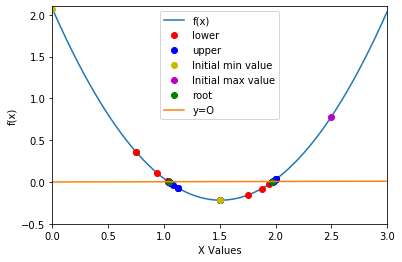

In [25]:
#create a figure
figure = plt.figure() 

#set the limit
plt.xlim(0,3)
plt.ylim(-0.5,2.1)

x = np.linspace(0,3,1000) #create a 1000 values of x between 0 and 3 
f_of_x = (1.01*(x**2)) - (3.04*x) + 2.07 #write the function
plt.plot(x,f_of_x,label="f(x)") #plot the function
plt.xlabel("X Values")
plt.ylabel("f(x)")

#plot the iteration between x = 0 and x = 1.5
plt.plot(x_root[1],x_root[3],'ro',label="lower")
plt.plot(x_root[2],x_root[4],'bo',label="upper")

#plot the iteration between x = 1.5 and x = 2.0
plt.plot(x_root_1[1],x_root_1[3],'ro')
plt.plot(x_root_1[2],x_root_1[4],'bo')

#plot the initial bracketing values
plt.plot(x_min,function_for_roots(x_min),'yo',label='Initial min value')
plt.plot(x_max,function_for_roots(x_max),'mo',label='Initial max value')
plt.plot(x_min_1,function_for_roots(x_min_1),'yo')
plt.plot(x_max_1,function_for_roots(x_max_1),'mo')

#plot the roots
plt.plot(x_root[0],y_root,'go',label="root")
plt.plot(x_root_1[0],y_root_1,'go')

#make the straight line
plt.plot(x, label="y=O")

plt.legend()